In [1]:
from qiskit.aqua.algorithms import Shor
from qiskit.aqua import QuantumInstance
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram


/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1000)
my_shor = Shor(N=15, a=2, quantum_instance=quantum_instance)

/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/aqua/algorithms/factorizers/shor.py:69: DeprecationWarning: The package qiskit.aqua.algorithms.factorizers is deprecated. It was moved/refactored to qiskit.algorithms.factorizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.factorizers',


In [3]:
Shor.run(my_shor)

/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


{'factors': [[3, 5]], 'total_counts': 59, 'successful_counts': 17}

In [4]:
def c_amod15(a,power):
    U = QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
        U=U.to_gate()
        U.name="%i^%i mod 15" %(a,power)
        c_U = U.control()
        return c_U

In [5]:
n_count = 8
a = 7
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name="QFT dagger"
    return qc

/var/folders/7j/_yrz2d6s5y9dqjwr_2s9vvq00000gn/T/ipykernel_4053/2174152826.py:9: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)), m, j)


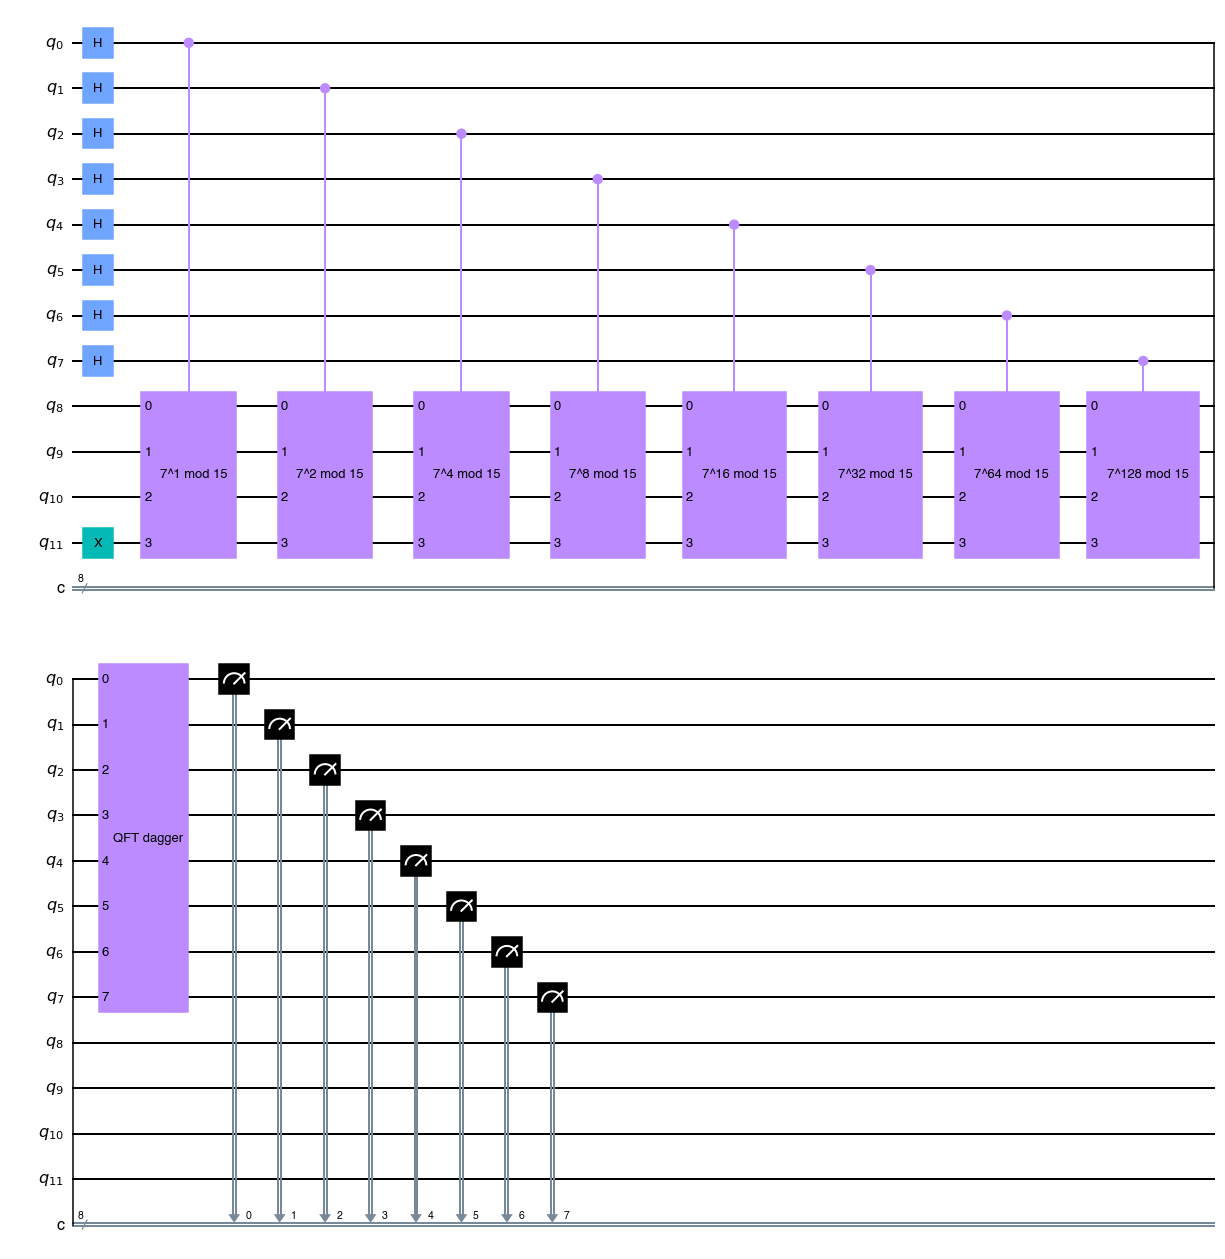

In [6]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)
qc.x(3 + n_count)

for q in range(n_count):
    qc.append(c_amod15(a,2**q), [q]+[i+n_count for i in range(4)])

qc.append(qft_dagger(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw('mpl')

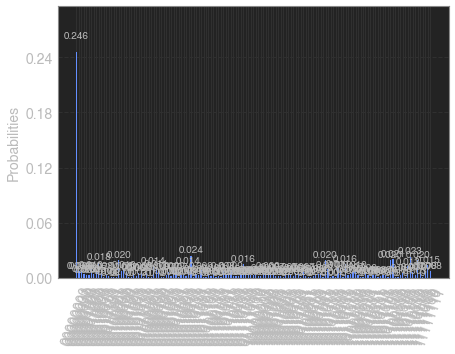

In [8]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)